In [6]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
X_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

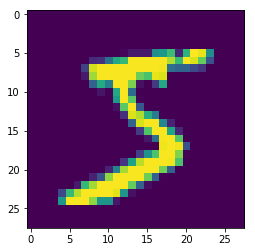

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3), padding="same", input_shape=(28, 28, 1)))

model.compile(optimizer="rmsprop", loss="mse")

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
model.fit(X_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0088
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.4567e-06
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4657e-06
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4594e-06
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4624e-06
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4615e-06
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4637e-06
Epoch 8/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.4569e-06
Epoch 9/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.4616e-06
Epoch 10/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.4622e-06


In [13]:
image = X_train[0]

image_predicted = model.predict(image.reshape(-1, 28, 28, 1))

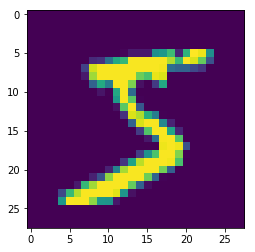

In [16]:
plt.imshow(image_predicted.reshape(28, 28))
plt.show()